#  一、 数据背景
历史风云变幻。经历二战的风雨之后，中、美、日三个国家纷纷开始新的经济发展之路。美国始终保持着全球第一的超级大国地位。直到现在依然坐稳全球老大的位置；日本在二战后迎来经济腾飞、一度逼近世界霸主美国，然而在近几十年却陷入经济停滞。中国几十年来艰难探索，最终开辟了一条**以经济建设为中心、坚持改革开放**的中国特色社会主义道路，尤其是在近二十年来经济获得飞速增长，不断有赶超美国的趋势。  
本次可视化任务是创建中、美、日三国年份-GDP的折线图，以便直观地感受**世界大国经济变化**历程。通过观看此图，能够激发我们建设伟大祖国的动力，为实现**中华民族伟大复兴**添砖加瓦。  
本次可视化数据摘取中、美、日三国1960-2021每年分别的国内生产总值（单位：十亿美元）。  
最终建立的图像如下所示：

![jupyter](./vz.png)


# 二、作图实现
###  1. 导入基础软件包
第一步是导入所有需要的软件包。为此，需要：
- pandas和它的DataFrame类来读取和处理数据
- numpy用于在图形中进行一些基本的数学计算
- plotnine来获取数据并创建图表，是可视化的基本库  
使用 plotnine 的 figure_size 函数来改变图的大小。调整了图的大小，使它们显示得更整齐。

In [169]:
import numpy as np # 数学运算工具库
import pandas as pd # 数据处理库
import plotnine # 可视化绘图库plotline
plotnine .options .figure_size=(7.5, 4.2) # 设置图像大小
from plotnine import * # 可视化绘图库plotline
from pandas import DataFrame # 表格处理库的DataFrame功能

### 2. 读入数据
GDP-.csv中包含了可视化所需的GDP数据。  
调用pandas当中的read_csv来读取表格数据。

In [5]:
GDP = pd.read_csv("GDP-.csv") # 读入数据

### 3. 初始化图

初始化图，需要告诉ggplot GDP是数据，并指定x轴绘制年份变量，y轴绘制GDP变量，分组变量叫做country。变量放在了一个叫做aes的方法里面。aes是审美映射的简称，它决定了变量将如何被映射到图表的各个部分。正如下面看到的，ggplot已经将年份映射到X轴上，将GDP映射到Y轴上。但输出图中没有任何东西，如下图所示。为了渲染数据，需要告诉ggplot想如何直观地表现它。

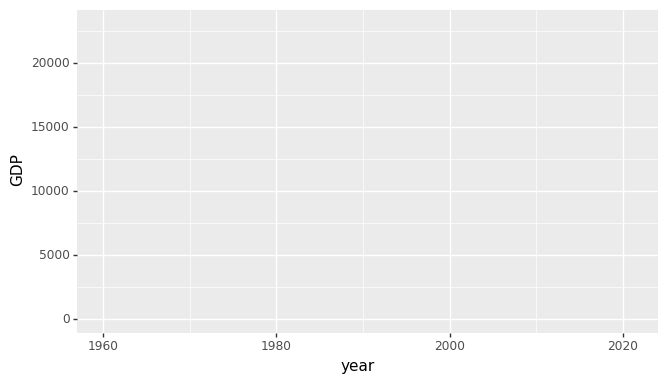

<ggplot: (105019623659)>

In [172]:
p1 = ggplot(GDP, aes("year", "GDP", colour="country"))
# ggplot读取GDP中数据，建立审美映射。其中横坐标取year值，纵坐标取GDP值，按照country值分类
p1

### 4. 线段图的呈现
可以使用 geoms原语来实现这一点。在线段图的情况下，使用*geom_line()*几何原语的输出。  
不同国家的数据按照不同颜色被初步展现出来了。但是，图片不够美观，我们需要进行加工。

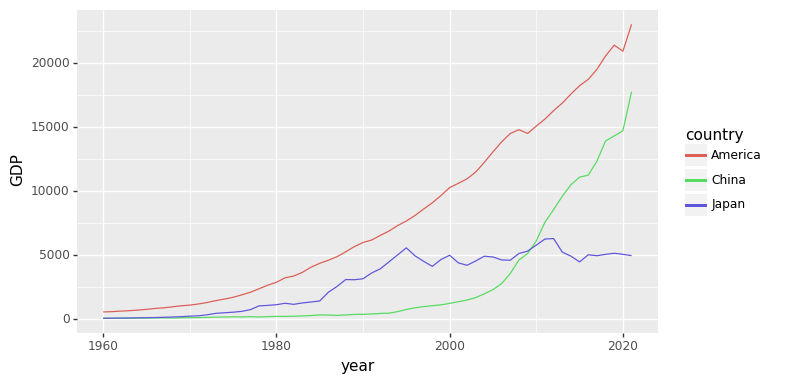

<ggplot: (105014235444)>

In [174]:
p1 = (
ggplot(GDP, aes("year", "GDP", colour="country"))
# 读取GDP中数据，建立审美映射。其中横坐标取year值，纵坐标取GDP值，按照country值分类
+ geom_line() # 绘制出折线图
)
p1

### 1.4 调整线宽
改变线的宽度，给geom_line添加一个size尺寸参数。  
我们设置线宽为1.5。

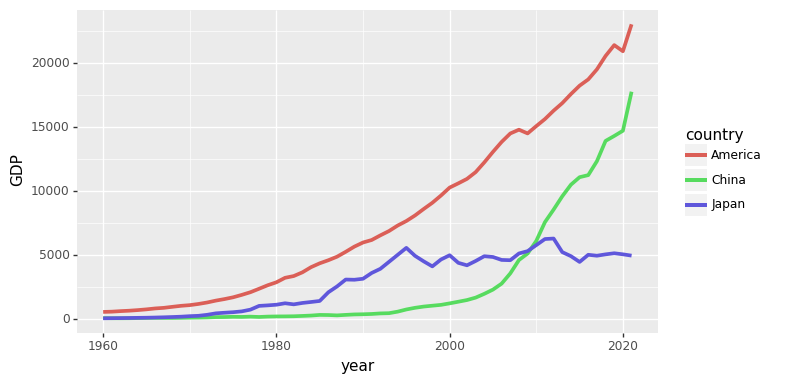

<ggplot: (105021393119)>

In [175]:
p1 = (
ggplot(GDP, aes("year", "GDP", colour="country"))
# 读取GDP中数据，建立审美映射。其中横坐标取year值，纵坐标取GDP值，按照country值分类
+ geom_line(size=1.5) # 绘制出折线图，并且加入size参数调整线条粗细为1.5
)
p1

### 1.5 调整轴的刻度
改变x轴的刻度线，使用*scale_x_continuous*选项，如下图所示。同样地改变Y轴，使用*scale_y_continuous*选项。  
使用breaks选项来改变断点，该选项需要一个数值列表作为参数.可以通过numpy的range函数,从指定的数值开始、停止值和步长值中分别生成一个序列。使用np.arange时，需要将停止参数设置为比想要的最大值多1。  
只改变了轴的刻度，并不会影响数据的展示。虽然我的x轴结束于2020，但实际上2021的数据也是在的。

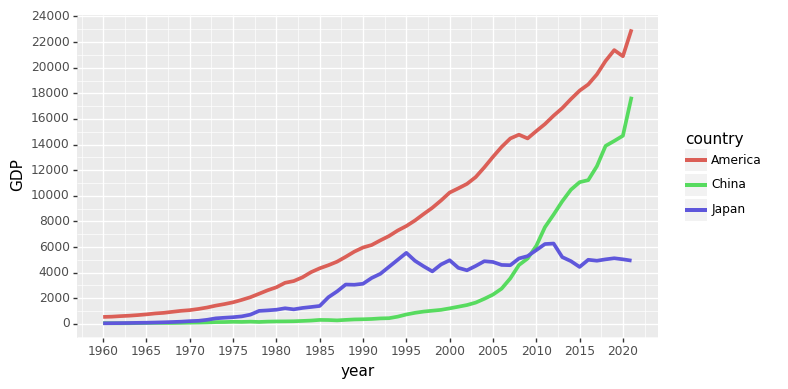

<ggplot: (105016797106)>

In [179]:
p1 = (
ggplot(GDP, aes("year", "GDP", colour="country"))
# 读取GDP中数据，建立审美映射。其中横坐标取year值，纵坐标取GDP值，按照country值颜色分类
+ geom_line(size=1.5) # 绘制出折线图，并且加入size参数调整线条粗细为1.5
+ scale_x_continuous(breaks=np .arange(1960, 2021, 5)) # 设置x轴坐标上下限以及步长
+ scale_y_continuous(breaks=np .arange(0, 24001, 2000)) # 设置y轴坐标上下限以及步长
)
p1

### 1.6 调整轴标签和添加标题
包括ggtitle选项添加标题。为了改变轴的标签，同样使用xlab和ylab参数。

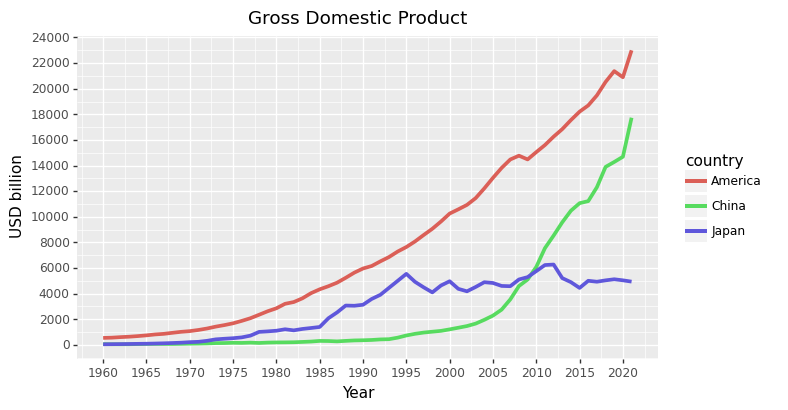

<ggplot: (143280079833)>

In [45]:
p1 = (
ggplot(GDP, aes("year", "GDP", colour="country"))
# 读取GDP中数据，建立审美映射。其中横坐标取year值，纵坐标取GDP值，按照country值分类
+ geom_line(size=1.5) # 绘制出折线图，并且加入size参数调整线条粗细为1.5
+ scale_x_continuous(breaks=np .arange(1960, 2021, 5)) # 设置x轴坐标上下限以及步长
+ scale_y_continuous(breaks=np .arange(0, 24001, 2000)) # 设置y轴坐标上下限以及步长
+ ggtitle("Gross Domestic Product") # 设置图的标题
+ xlab("Year") # 修改x轴标签
+ ylab("USD billion") # 修改y轴标签
)
p1


### 1.7 调整线条颜色
使用*scale_colour_manual*方法，试着把线条改成 Rebecca紫色、红色和金色。

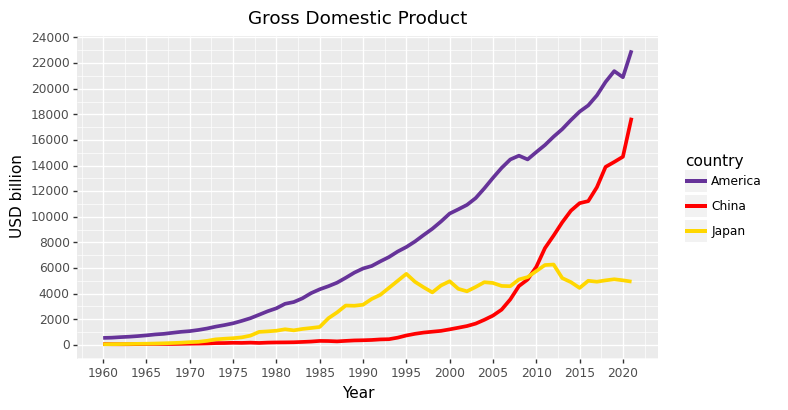

<ggplot: (143278783347)>

In [46]:
p1 = (
ggplot(GDP, aes("year", "GDP", colour="country"))
# 读取GDP中数据，建立审美映射。其中横坐标取year值，纵坐标取GDP值，按照country值分类
+ geom_line(size=1.5) # 绘制出折线图，并且加入size参数调整线条粗细为1.5
+ scale_x_continuous(breaks=np .arange(1960, 2021, 5)) # 设置x轴坐标上下限以及步长
+ scale_y_continuous(breaks=np .arange(0, 24001, 2000)) # 设置y轴坐标上下限以及步长
+ ggtitle("Gross Domestic Product") # 设置图的标题
+ xlab("Year") # 修改x轴标签
+ ylab("USD billion") # 修改y轴标签
+ scale_colour_manual(values=["rebeccapurple", "red", "gold"]) # 设置每一国家对应的颜色值分别为rebecca紫、红、金
)
p1

还可以使用特定的HEX代码来改变颜色，把线条颜色改为指定的颜色。

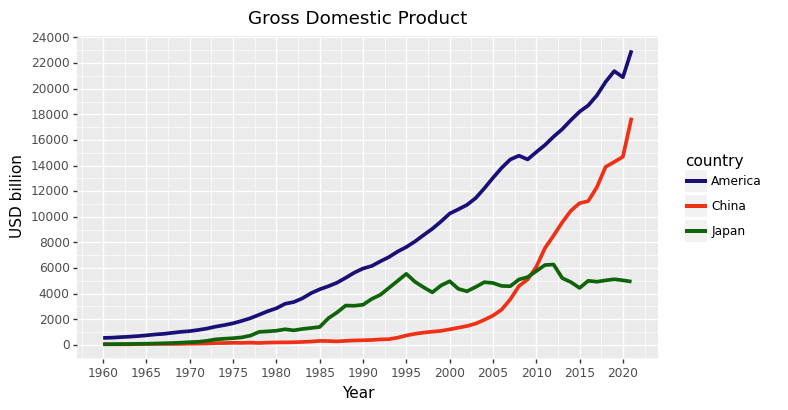

<ggplot: (143280078662)>

In [78]:
p1 = (
ggplot(GDP, aes("year", "GDP", colour="country"))
# 读取GDP中数据，建立审美映射。其中横坐标取year值，纵坐标取GDP值，按照country值分类
+ geom_line(size=1.5) # 绘制出折线图，并且加入size参数调整线条粗细为1.5
+ scale_x_continuous(breaks=np .arange(1960, 2021, 5)) # 设置x轴坐标上下限以及步长
+ scale_y_continuous(breaks=np .arange(0, 24001, 2000)) # 设置y轴坐标上下限以及步长
+ ggtitle("Gross Domestic Product") # 设置图的标题
+ xlab("Year") # 修改x轴标签
+ ylab("USD billion") # 修改y轴标签
+ scale_colour_manual(["#1A0F77","#F03015","#0F6409"]) # 按照HEX代码设置颜色
)
p1

还可以使用ColorBrewer的方案。在这里，使用*scale_colour_brewer*函数。type选择数据类型，palette可以直接填入内置的调色板名字，也可以填编号，系统自动找到编号为索引的调色板列表对应元素。

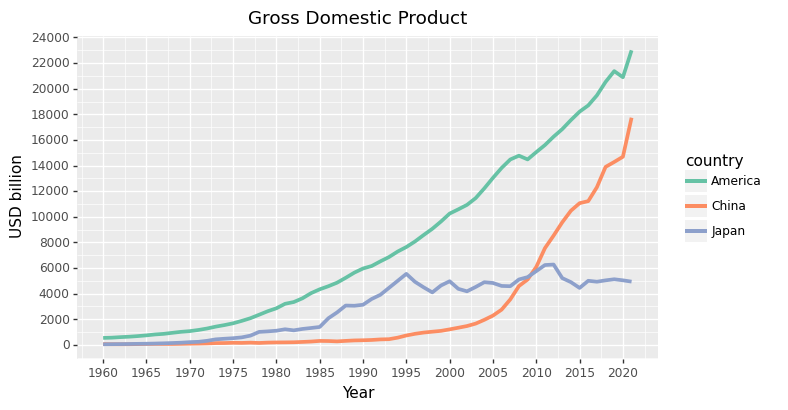

<ggplot: (105013551132)>

In [180]:
p1 = (
ggplot(GDP, aes("year", "GDP", colour="country"))
# 读取GDP中数据，建立审美映射。其中横坐标取year值，纵坐标取GDP值，按照country值分类
+ geom_line(size=1.5) # 绘制出折线图，并且加入size参数调整线条粗细为1.5
+ scale_x_continuous(breaks=np .arange(1960, 2021, 5)) # 设置x轴坐标上下限以及步长
+ scale_y_continuous(breaks=np .arange(0, 24001, 2000)) # 设置y轴坐标上下限以及步长
+ ggtitle("Gross Domestic Product") # 设置图的标题
+ xlab("Year") # 修改x轴标签
+ ylab("USD billion") # 修改y轴标签
+ scale_colour_brewer(type="qual", palette=7) #  使用ColorBrewer的方案。使用了调色板编号7。
)
p1

### 1.8 调整图例
将图例设置在图像右方，指定参数 legend_position="right" 。还可以使用legend_direction="vertical "参数来改变图例排列形状为垂直。最后，可以使用参数 legend_title_align="center "将图例的标题位置居中。

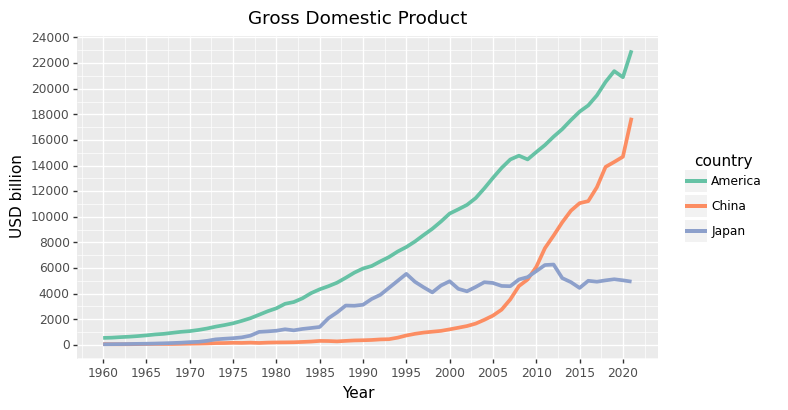

<ggplot: (105017433043)>

In [181]:
p1 = (
ggplot(GDP, aes("year", "GDP", colour="country"))
# 读取GDP中数据，建立审美映射。其中横坐标取year值，纵坐标取GDP值，按照country值分类
+ geom_line(size=1.5) # 绘制出折线图，并且加入size参数调整线条粗细为1.5
+ scale_x_continuous(breaks=np .arange(1960, 2021, 5)) # 设置x轴坐标上下限以及步长
+ scale_y_continuous(breaks=np .arange(0, 24001, 2000)) # 设置y轴坐标上下限以及步长
+ ggtitle("Gross Domestic Product") # 设置图的标题
+ xlab("Year") # 修改x轴标签
+ ylab("USD billion") # 修改y轴标签
+ scale_colour_brewer(type="qual", palette=7) # 使用ColorBrewer的方案。使用了调色板编号7。
+ theme(
legend_position="right", # 图例位于图的右侧
legend_direction="vertical", # 图例排列方式为垂直
legend_title_align="center", # 标题对齐方式为居中
)
)
p1

添加*legend_key*设置element_rect对象值，填充背景色和边框色为白色。设置*legend_margin*的值，即图例与内框之间的填充。

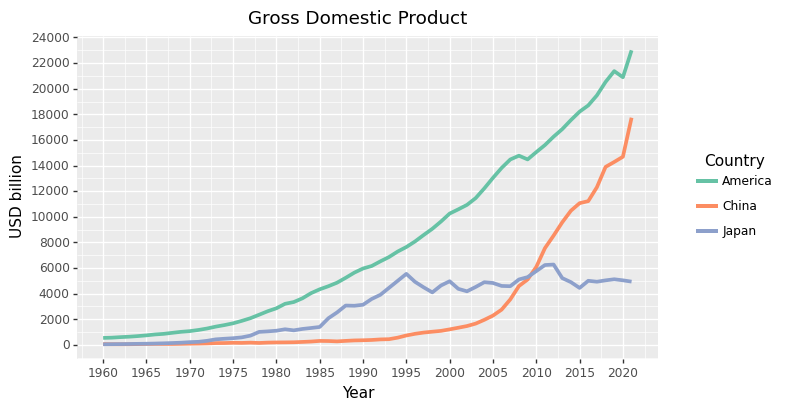

<ggplot: (105015905886)>

In [83]:
p1 = (
ggplot(GDP, aes("year", "GDP", colour="country"))
# 读取GDP中数据，建立审美映射。其中横坐标取year值，纵坐标取GDP值，按照country值分类
+ geom_line(size=1.5) # 绘制出折线图，并且加入size参数调整线条粗细为1.5
+ scale_x_continuous(breaks=np .arange(1960, 2021, 5)) # 设置x轴坐标上下限以及步长
+ scale_y_continuous(breaks=np .arange(0, 24001, 2000)) # 设置y轴坐标上下限以及步长
+ ggtitle("Gross Domestic Product") # 设置图的标题
+ xlab("Year") # 修改x轴标签
+ ylab("USD billion") # 修改y轴标签
+ scale_colour_brewer(type="qual", palette=7, name="Country") # 使用ColorBrewer的方案。使用了调色板编号7。同时，还修改了图例的标题。
+ theme(
legend_position="right", # 图例位于图的右侧
legend_direction="vertical", # 图例排列方式为垂直
legend_title_align="center", # 标题对齐方式为居中
legend_key=element_rect(fill="white",color="white"),# 继续调整图例，设置背景和边框为白色
legend_margin=1.0, # 图例与内框之间的填充
)
)
p1

设置图例的字体，*legend_title*设置标题字形为普通，背景色为白色，垂直排列方式为bottom（实际上标题被上移了）。  
*legend_text*设置图例内容字形为斜体，背景色为白色。  
*legend_entry_spacing_y*设置图例单元之间的垂直距离。

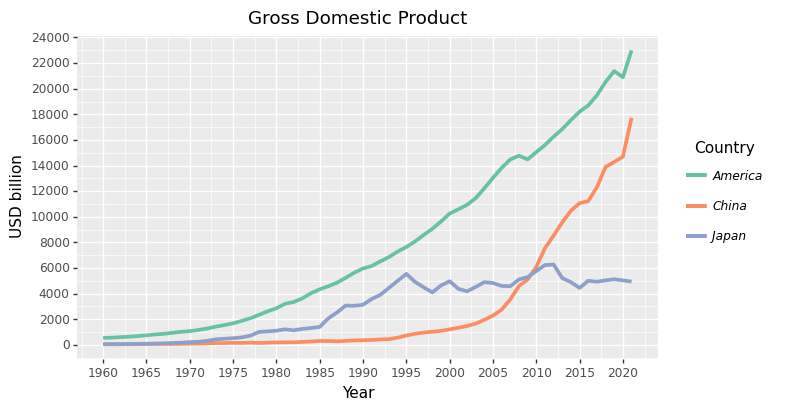

<ggplot: (105019484657)>

In [84]:
p1 = (
ggplot(GDP, aes("year", "GDP", colour="country"))
# 读取GDP中数据，建立审美映射。其中横坐标取year值，纵坐标取GDP值，按照country值分类
+ geom_line(size=1.5) # 绘制出折线图，并且加入size参数调整线条粗细为1.5
+ scale_x_continuous(breaks=np .arange(1960, 2021, 5)) # 设置x轴坐标上下限以及步长
+ scale_y_continuous(breaks=np .arange(0, 24001, 2000)) # 设置y轴坐标上下限以及步长
+ ggtitle("Gross Domestic Product") # 设置图的标题
+ xlab("Year") # 修改x轴标签
+ ylab("USD billion") # 修改y轴标签
+ scale_colour_brewer(type="qual", palette=7, name="Country") # 使用ColorBrewer的方案。使用了调色板编号7。同时，还修改了图例的标题。
+ theme(
legend_position="right", # 图例位于图的右侧
legend_direction="vertical", # 图例排列方式为垂直
legend_title_align="center", # 标题对齐方式为居中
legend_key=element_rect(fill="white",color="white"),# 继续调整图例，设置背景和边框为白色
legend_margin=1.0, # 图例与内框之间的填充
legend_title=element_text(style="normal",backgroundcolor="white",va="bottom"),# 图例标题字体设为普通，背景为白色，垂直对齐为底部（文字上移）
legend_text=element_text(style="italic",backgroundcolor="white"), #  图例元素字体设为斜体，背景为白色
legend_entry_spacing_y=6, # 各图例单元之间的垂直距离
)
)
p1

### 1.10 尝试各种主题
使用主题来改变图形的整体外观。  
在手册中可以看到可选的内置主题列表。
*theme_bw()*  白色主题：  
该主题简约，但不够美观。

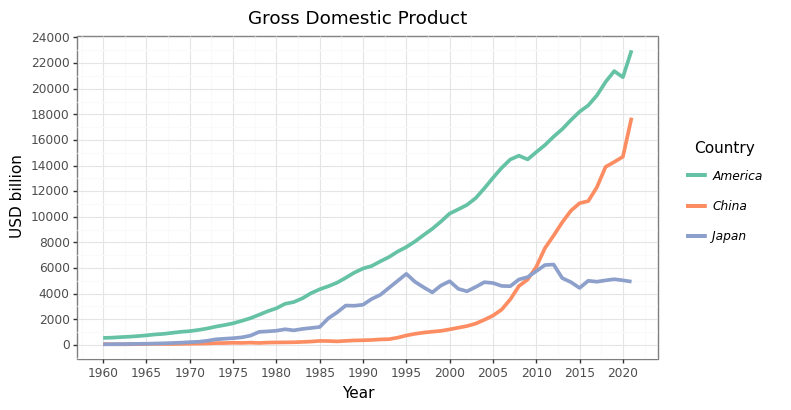

<ggplot: (105019758343)>

In [85]:
p1 = (
ggplot(GDP, aes("year", "GDP", colour="country"))
# 读取GDP中数据，建立审美映射。其中横坐标取year值，纵坐标取GDP值，按照country值分类
+ geom_line(size=1.5) # 绘制出折线图，并且加入size参数调整线条粗细为1.5
+ scale_x_continuous(breaks=np .arange(1960, 2021, 5)) # 设置x轴坐标上下限以及步长
+ scale_y_continuous(breaks=np .arange(0, 24001, 2000)) # 设置y轴坐标上下限以及步长
+ ggtitle("Gross Domestic Product") # 设置图的标题
+ xlab("Year") # 修改x轴标签
+ ylab("USD billion") # 修改y轴标签
+ scale_colour_brewer(type="qual", palette=7, name="Country") # 使用ColorBrewer的方案。使用了调色板编号7。同时，还修改了图例的标题。
+ theme_bw()#使用白色主题
+ theme(
legend_position="right", # 图例位于图的右侧
legend_direction="vertical", # 图例排列方式为垂直
legend_title_align="center", # 标题对齐方式为居中
legend_key=element_rect(fill="white",color="white"),# 继续调整图例，设置背景和边框为白色
legend_margin=1.0, # 图例与内框之间的填充
legend_title=element_text(style="normal",backgroundcolor="white",va="bottom"),# 图例标题字体设为普通，背景为白色，垂直对齐为底部（文字上移）
legend_text=element_text(style="italic",backgroundcolor="white"), #  图例元素字体设为斜体，背景为白色
legend_entry_spacing_y=6, # 各图例单元之间的垂直距离
)
)
p1


*theme_538()*  538主题：  
该主题色调较暗，并且和图例有不搭之处。

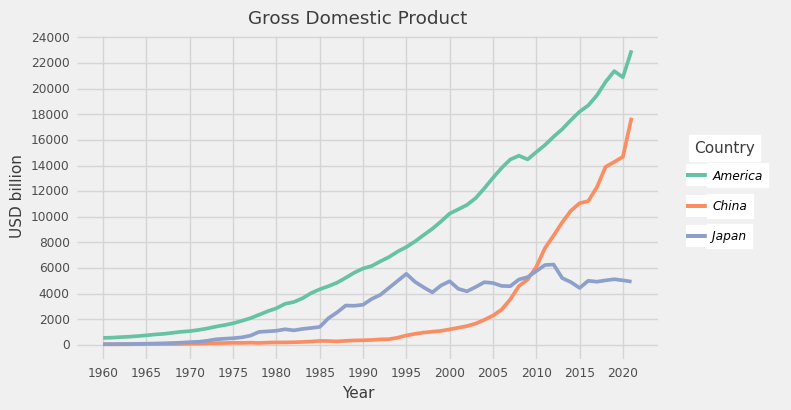

<ggplot: (105019991796)>

In [86]:
p1 = (
ggplot(GDP, aes("year", "GDP", colour="country"))
# 读取GDP中数据，建立审美映射。其中横坐标取year值，纵坐标取GDP值，按照country值分类
+ geom_line(size=1.5) # 绘制出折线图，并且加入size参数调整线条粗细为1.5
+ scale_x_continuous(breaks=np .arange(1960, 2021, 5)) # 设置x轴坐标上下限以及步长
+ scale_y_continuous(breaks=np .arange(0, 24001, 2000)) # 设置y轴坐标上下限以及步长
+ ggtitle("Gross Domestic Product") # 设置图的标题
+ xlab("Year") # 修改x轴标签
+ ylab("USD billion") # 修改y轴标签
+ scale_colour_brewer(type="qual", palette=7, name="Country") # 使用ColorBrewer的方案。使用了调色板编号7。同时，还修改了图例的标题。
+ theme_538()#使用538主题
+ theme(
legend_position="right", # 图例位于图的右侧
legend_direction="vertical", # 图例排列方式为垂直
legend_title_align="center", # 标题对齐方式为居中
legend_key=element_rect(fill="white",color="white"),# 继续调整图例，设置背景和边框为白色
legend_margin=1.0, # 图例与内框之间的填充
legend_title=element_text(style="normal",backgroundcolor="white",va="bottom"),# 图例标题字体设为普通，背景为白色，垂直对齐为底部（文字上移）
legend_text=element_text(style="italic",backgroundcolor="white"), #  图例元素字体设为斜体，背景为白色
legend_entry_spacing_y=6, # 各图例单元之间的垂直距离
)
)
p1

*theme_classic()*  经典主题：  
该主题去除了网格线，较为空洞。

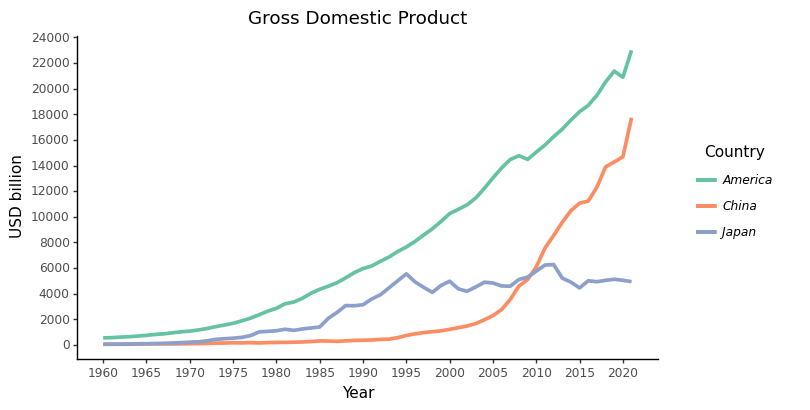

<ggplot: (105012553238)>

In [54]:
p1 = (
ggplot(GDP, aes("year", "GDP", colour="country"))
#读取GDP中数据，建立审美映射。其中横坐标取year值，纵坐标取GDP值，按照country值分类
+ geom_line(size=1.5) # 绘制出折线图，并且加入size参数调整线条粗细为1.5
+ scale_x_continuous(breaks=np .arange(1960, 2021, 5)) # 设置x轴坐标上下限以及步长
+ scale_y_continuous(breaks=np .arange(0, 24001, 2000)) # 设置y轴坐标上下限以及步长
+ ggtitle("Gross Domestic Product") # 设置图的标题
+ xlab("Year") # 修改x轴标签
+ ylab("USD billion") # 修改y轴标签
+ scale_colour_brewer(type="qual", palette=7, name="Country") # 使用ColorBrewer的方案。使用了调色板编号7。同时，还修改了图例的标题。
+ theme_classic()#使用classic主题
+ theme(
legend_position="right", # 图例位于图的右侧
legend_direction="vertical", # 图例排列方式为垂直
legend_title_align="center", # 标题对齐方式为居中
legend_key=element_rect(fill="white",color="white"),# 继续调整图例，设置背景和边框为白色
legend_margin=8.0, # 调整图例到图边缘的距离
legend_title=element_text(style="normal",backgroundcolor="white",va="bottom"),# 图例标题字体设为普通，背景为白色，垂直对齐为底部（文字上移）
legend_text=element_text(style="italic",backgroundcolor="white"), #  图例元素字体设为斜体，背景为白色
legend_entry_spacing_y=3, # 各图例单元之间的垂直距离
)
)
p1

上述各种主题都不尽如人意，我选择自己设置主题。  
自己设置主题的关键任务是选择好看的字体。因此，下一步是导入可用字体。

### 1.11 导入字体或使用内置字体
使用本地的字体文件，或者使用内置字体调整图中各部分text的字体。  
需要导入matplotlib的字体处理包。本地的字体文件可以用于创建字体对象，供绘图时使用。也可以使用程序内置字体。

In [182]:
import matplotlib.font_manager as fm # 导入matplotlib的字体处理包
agm = "AtlasGrotesk-Medium.otf"
agr = "AtlasGrotesk-Regular.otf"
dp = "DecimaMonoPro.otf"
xkcd = "xkcd-Regular.otf" # 导入本地字体文件
title_text = fm.FontProperties(fname=xkcd)
legend_text = fm.FontProperties(fname=agr,style="oblique")
axis_text = fm.FontProperties(fname=xkcd)
body_text = fm.FontProperties(fname=dp) # 根据字体文件创建字体对象

修改字体对象的大小：

In [183]:
title_text .set_size(18)
legend_text .set_size(10)
axis_text .set_size(12)
body_text .set_size(10) # 设置字体对象大小

图例的标题、内容字体可以通过建立好的字体对象进行修改：

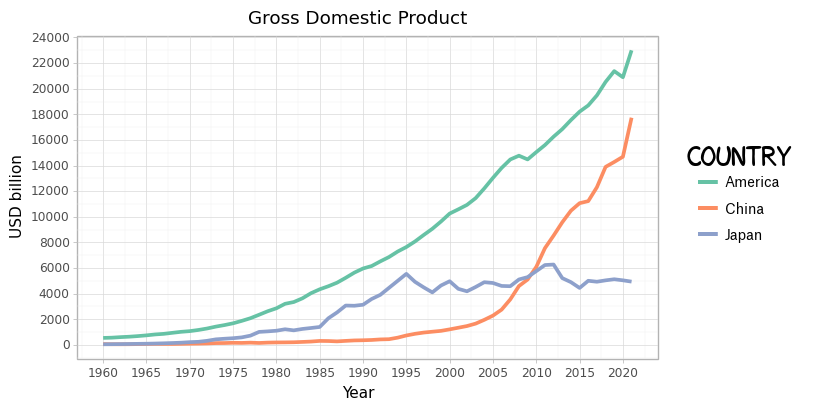

<ggplot: (105013693585)>

In [184]:
p1 = (
ggplot(GDP, aes("year", "GDP", colour="country"))
# 读取GDP中数据，建立审美映射。其中横坐标取year值，纵坐标取GDP值，按照country值分类
+ geom_line(size=1.5) # 绘制出折线图，并且加入size参数调整线条粗细为1.5
+ scale_x_continuous(breaks=np .arange(1960, 2021, 5)) # 设置x轴坐标上下限以及步长
+ scale_y_continuous(breaks=np .arange(0, 24001, 2000)) # 设置y轴坐标上下限以及步长
+ ggtitle("Gross Domestic Product") # 设置图的标题
+ xlab("Year") # 修改x轴标签
+ ylab("USD billion") # 修改y轴标签
+ scale_colour_brewer(type="qual", palette=7, name="Country") # 使用ColorBrewer的方案。使用了调色板编号7。同时，还修改了图例的标题。
+ theme_light()#使用light主题
+ theme(
legend_position="right", # 图例位于图的右侧
legend_direction="vertical", # 图例排列方式为垂直
legend_title_align="center", # 标题对齐方式为居中
legend_key=element_rect(fill="white",color="white"),# 继续调整图例，设置背景和边框为白色
legend_margin=1.0, # 图例与内框之间的填充
legend_title=element_text(backgroundcolor="white",va="bottom",fontproperties=title_text),# 背景为白色，垂直对齐为底部（文字上移）
legend_text=element_text(backgroundcolor="white",fontproperties=legend_text), #  图例元素字体设为斜体，背景为白色
# 字体对象已经被创建，按照该字体对象来展示字体
legend_entry_spacing_y=3, # 各图例单元之间的垂直距离
)
)
p1

### 1.12 主题的修改与图形的最终形成
要打造自己的主题，需要对theme内部选项进行一些设置。  
第一步，调整 *legend_box_spacing* 的值，设置图例与图的距离：

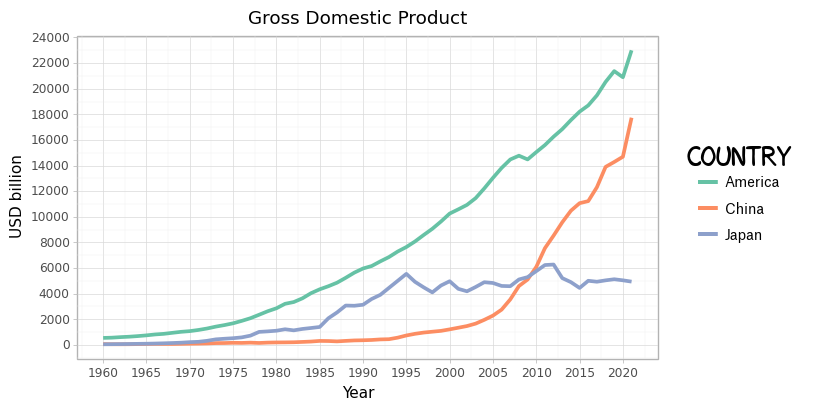

<ggplot: (105013234384)>

In [117]:
p1 = (
ggplot(GDP, aes("year", "GDP", colour="country"))
# 读取GDP中数据，建立审美映射。其中横坐标取year值，纵坐标取GDP值，按照country值分类
+ geom_line(size=1.5) # 绘制出折线图，并且加入size参数调整线条粗细为1.5
+ scale_x_continuous(breaks=np .arange(1960, 2021, 5)) # 设置x轴坐标上下限以及步长
+ scale_y_continuous(breaks=np .arange(0, 24001, 2000)) # 设置y轴坐标上下限以及步长
+ ggtitle("Gross Domestic Product") # 设置图的标题
+ xlab("Year") # 修改x轴标签
+ ylab("USD billion") # 修改y轴标签
+ scale_colour_brewer(type="qual", palette=7, name="Country") # 使用ColorBrewer的方案。使用了调色板编号7。同时，还修改了图例的标题。
+ theme_light()#使用light主题
+ theme(
legend_position="right", # 图例位于图的右侧
legend_direction="vertical", # 图例排列方式为垂直
legend_title_align="center", # 标题对齐方式为居中
legend_key=element_rect(fill="white",color="white"),# 继续调整图例，设置背景和边框为白色
legend_margin=1.0, # 图例与内框之间的填充
legend_title=element_text(backgroundcolor="white",va="bottom",fontproperties=title_text),# 设置图例标题字体，背景为白色，垂直对齐为底部（文字上移）
legend_text=element_text(backgroundcolor="white",fontproperties=legend_text), #  设置图例文字字体，背景为白色
legend_entry_spacing_y=3, # 各图例单元之间的垂直距离
legend_box_spacing=0.1, # 调整图例与图的距离
)
)
p1

接下来。改变 *axis_line* 的大小和颜色参数，可以加粗线条并将其颜色改为黑色。  
改变传递给 *panel_grid_major* 的参数，调整主网格线粗细和颜色。  
同样，通过改变 *panel_grid_minor*、*panel_border* 和 *panel_background* 的参数来调整次网格线、边界和背景颜色等信息。  
由于暂时还没有确定心仪的颜色，背景颜色先设置为空白。

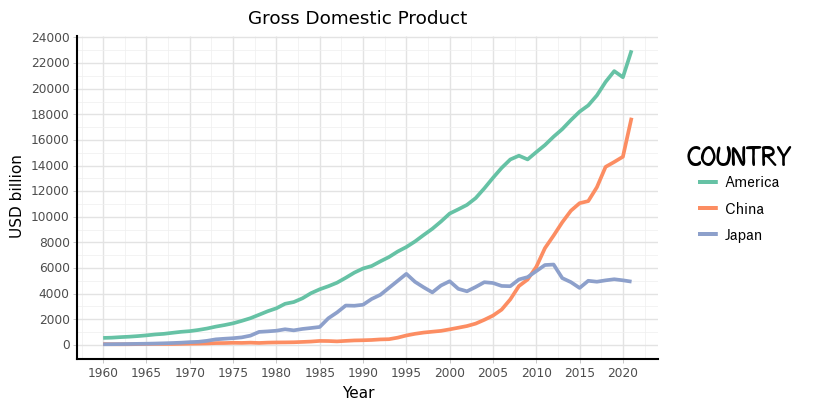

<ggplot: (105016033699)>

In [116]:
p1 = (
ggplot(GDP, aes("year", "GDP", colour="country"))
# 读取GDP中数据，建立审美映射。其中横坐标取year值，纵坐标取GDP值，按照country值颜色分类
+ geom_line(size=1.5) # 绘制出折线图，并且加入size参数调整线条粗细为1.5
+ scale_x_continuous(breaks=np .arange(1960, 2021, 5)) # 设置x轴坐标上下限以及步长
+ scale_y_continuous(breaks=np .arange(0, 24001, 2000)) # 设置y轴坐标上下限以及步长
+ ggtitle("Gross Domestic Product") # 设置图的标题
+ xlab("Year") # 修改x轴标签
+ ylab("USD billion") # 修改y轴标签
+ scale_colour_brewer(type="qual", palette=7, name="Country") # 使用ColorBrewer的方案。使用了调色板编号7。同时，还修改了图例的标题。
+ theme_light()#使用light主题
+ theme(
legend_position="right", # 图例位于图的右侧
legend_direction="vertical", # 图例排列方式为垂直
legend_title_align="center", # 标题对齐方式为居中
legend_key=element_rect(fill="white",color="white"),# 继续调整图例，设置背景和边框为白色
legend_margin=1.0, # 图例与内框之间的填充
legend_title=element_text(backgroundcolor="white",va="bottom",fontproperties=title_text),# 设置图例标题字体，背景为白色，垂直对齐为底部（文字上移）
legend_text=element_text(backgroundcolor="white",fontproperties=legend_text), #  设置图例文字字体，背景为白色
legend_entry_spacing_y=3, # 各图例单元之间的垂直距离
legend_box_spacing=0.1, # 调整图例与图的距离
axis_line=element_line(size=1.5, colour="black"), # 设置轴线的粗细和颜色
panel_grid_major=element_line(size=1,colour="#e3e3e3"), # 设置大网格线的粗细、颜色
panel_grid_minor=element_line(size=0.5,colour="#efefef"), # 设置小网格线的粗细、颜色
panel_border=element_blank(), # 边框为空白
panel_background=element_blank(), # 背景颜色为空白
)
)
p1


作字体设置。  
*plot_title*为图片大标题字体，利用内置字体DejaVu Sans，设置大小和字形加粗。  
*axis_text_x*为x轴上数据文字字体，利用内置字体SimHei,设置大小、颜色。y轴类似。  
*axis_title_x*为x轴上标签字体，利用先前设置好的字体对象，设置大小、颜色。y轴类似。

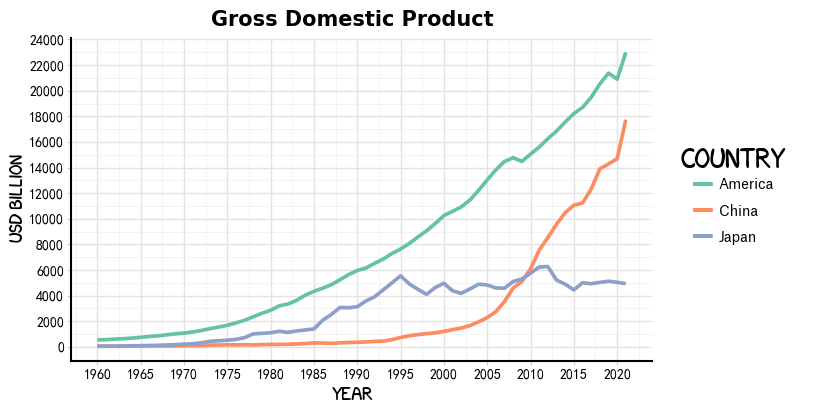

<ggplot: (105014362944)>

In [115]:
p1 = (
ggplot(GDP, aes("year", "GDP", colour="country"))
# 读取GDP中数据，建立审美映射。其中横坐标取year值，纵坐标取GDP值，按照country值颜色分类
+ geom_line(size=1.5) # 绘制出折线图，并且加入size参数调整线条粗细为1.5
+ scale_x_continuous(breaks=np .arange(1960, 2021, 5)) # 设置x轴坐标上下限以及步长
+ scale_y_continuous(breaks=np .arange(0, 24001, 2000)) # 设置y轴坐标上下限以及步长
+ ggtitle("Gross Domestic Product") # 设置图的标题
+ xlab("Year") # 修改x轴标签
+ ylab("USD billion") # 修改y轴标签
+ scale_colour_brewer(type="qual", palette=7, name="Country") # 使用ColorBrewer的方案。使用了调色板编号7。同时，还修改了图例的标题。
+ theme_light()#使用light主题
+ theme(
legend_position="right", # 图例位于图的右侧
legend_direction="vertical", # 图例排列方式为垂直
legend_title_align="center", # 标题对齐方式为居中
legend_key=element_rect(fill="white",color="white"),# 继续调整图例，设置背景和边框为白色
legend_margin=1.0, # 图例与内框之间的填充
legend_title=element_text(backgroundcolor="white",va="bottom",fontproperties=title_text),# 设置图例标题字体，背景为白色，垂直对齐为底部（文字上移）
legend_text=element_text(backgroundcolor="white",fontproperties=legend_text), #  设置图例文字字体，背景为白色
legend_entry_spacing_y=3, # 各图例单元之间的垂直距离
legend_box_spacing=0.1, # 调整图例与图的距离
axis_line=element_line(size=1.5, colour="black"), # 设置轴线的粗细和颜色
panel_grid_major=element_line(size=1,colour="#e3e3e3"), # 设置大网格线的粗细、颜色
panel_grid_minor=element_line(size=0.5,colour="#efefef"), # 设置小网格线的粗细、颜色
panel_border=element_blank(), # 边框为空白
panel_background=element_blank(), # 背景颜色为空白
plot_title=element_text(size=15, family="DejaVu Sans",face="bold"), # 设置大标题的字体、大小、字形，利用内置字体
axis_text_x=element_text(colour="black", size=10,family="SimHei"), # 设置x轴字体格式，利用内置字体
axis_text_y=element_text(colour="black", size=10,family="SimHei"), # 设置y轴字体格式，利用内置字体
axis_title_x=element_text(colour="black",size=12,fontproperties=axis_text),# 设置x轴标题字体格式，利用字体对象
axis_title_y=element_text(colour="black", size=12,fontproperties=axis_text)# 设置y轴标题字体格式，利用字体对象
)
)
p1

添加几何原语*geom_point*，设置size点大小，创建标记点。同时在图例中也自动产生点。

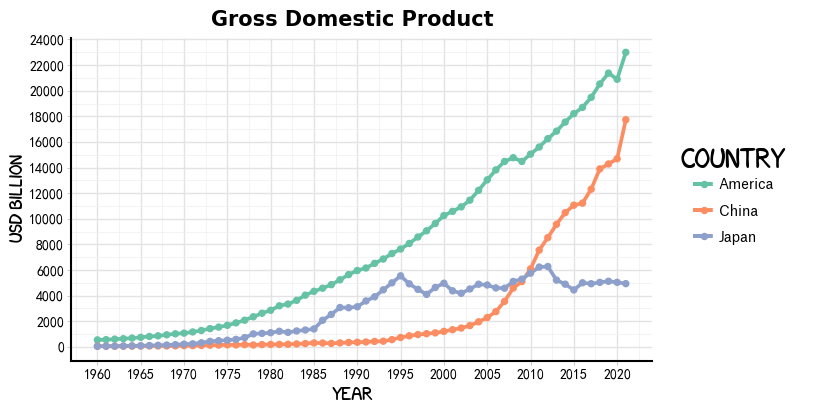

<ggplot: (105021788293)>

In [154]:
p1 = (
ggplot(GDP, aes("year", "GDP", colour="country"))
# 读取GDP中数据，建立审美映射。其中横坐标取year值，纵坐标取GDP值，按照country值颜色分类
+ geom_line(size=1.5) # 绘制出折线图，并且加入size参数调整线条粗细为1.5
+ geom_point(size=2.0) # 添加点来创建一个标记线
+ scale_x_continuous(breaks=np .arange(1960, 2021, 5)) # 设置x轴坐标上下限以及步长
+ scale_y_continuous(breaks=np .arange(0, 24001, 2000)) # 设置y轴坐标上下限以及步长
+ ggtitle("Gross Domestic Product") # 设置图的标题
+ xlab("Year") # 修改x轴标签
+ ylab("USD billion") # 修改y轴标签
+ scale_colour_brewer(type="qual", palette=7, name="Country") # 使用ColorBrewer的方案。使用了调色板编号7。同时，还修改了图例的标题。
+ theme_light()#使用light主题
+ theme(
legend_position="right", # 图例位于图的右侧
legend_direction="vertical", # 图例排列方式为垂直
legend_title_align="center", # 标题对齐方式为居中
legend_key=element_rect(fill="white",color="white"),# 继续调整图例，设置背景和边框为白色
legend_margin=1.0, # 图例与内框之间的填充
legend_title=element_text(backgroundcolor="white",va="bottom",fontproperties=title_text),# 设置图例标题字体，背景为白色，垂直对齐为底部（文字上移）
legend_text=element_text(backgroundcolor="white",fontproperties=legend_text), #  设置图例文字字体，背景为白色
legend_entry_spacing_y=3, # 各图例单元之间的垂直距离
legend_box_spacing=0.1, # 调整图例与图的距离
axis_line=element_line(size=1.5, colour="black"), # 设置轴线的粗细和颜色
panel_grid_major=element_line(size=1,colour="#e3e3e3"), # 设置大网格线的粗细、颜色
panel_grid_minor=element_line(size=0.5,colour="#efefef"), # 设置小网格线的粗细、颜色
panel_border=element_blank(), # 边框为空白
panel_background=element_blank(), # 背景颜色为空白
plot_title=element_text(size=15, family="DejaVu Sans",face="bold"), # 设置大标题的字体、大小、字形，利用内置字体
axis_text_x=element_text(colour="black", size=10,family="SimHei"), # 设置x轴字体格式，利用内置字体
axis_text_y=element_text(colour="black", size=10,family="SimHei"), # 设置y轴字体格式，利用内置字体
axis_title_x=element_text(colour="black",size=12,fontproperties=axis_text),# 设置x轴标题字体格式，利用字体对象
axis_title_y=element_text(colour="black", size=12,fontproperties=axis_text)# 设置y轴标题字体格式，利用字体对象
)
)
p1

最后调整背景颜色。图例当中也跟着需要修改，以保持图片整体的统一美观。  
这里需要选一个不鲜艳、浅色之背景。但是又不能是乏味的黑白灰。我最终选择了fdfdf0的米黄。  
绘图基本完成，得到了一开始展示的图。

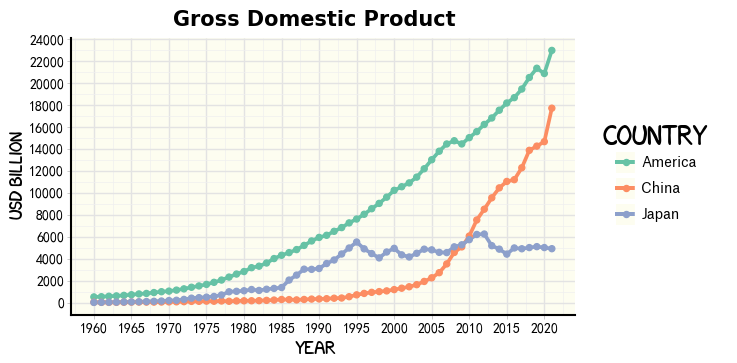

<ggplot: (105014273774)>

In [168]:
p1 = (
ggplot(GDP, aes("year", "GDP", colour="country"))
# 读取GDP中数据，建立审美映射。其中横坐标取year值，纵坐标取GDP值，按照country值颜色分类
+ geom_line(size=1.5) # 绘制出折线图，并且加入size参数调整线条粗细为1.5
+ geom_point(size=2.0) # 添加点来创建一个标记线
+ scale_x_continuous(breaks=np .arange(1960, 2021, 5)) # 设置x轴坐标上下限以及步长
+ scale_y_continuous(breaks=np .arange(0, 24001, 2000)) # 设置y轴坐标上下限以及步长
+ ggtitle("Gross Domestic Product") # 设置图的标题
+ xlab("Year") # 修改x轴标签
+ ylab("USD billion") # 修改y轴标签
+ scale_colour_brewer(type="qual", palette=7, name="Country") # 使用ColorBrewer的方案。使用了调色板编号7。同时，还修改了图例的标题。
+ theme_light()#使用light主题
+ theme(
legend_position="right", # 图例位于图的右侧
legend_direction="vertical", # 图例排列方式为垂直
legend_title_align="center", # 标题对齐方式为居中
legend_key=element_rect(fill="#fdfdf0",color="white"),# 继续调整图例，设置背景颜色，设置边框为白色
legend_margin=1.0, # 图例与内框之间的填充
legend_title=element_text(backgroundcolor="white",va="bottom",fontproperties=title_text),# 设置图例标题字体，背景为白色，垂直对齐为底部（文字上移）
legend_text=element_text(backgroundcolor="white",fontproperties=legend_text), #  设置图例文字字体，背景为白色
legend_entry_spacing_y=3, # 各图例单元之间的垂直距离
legend_box_spacing=0.1, # 调整图例与图的距离
axis_line=element_line(size=1.5, colour="black"), # 设置轴线的粗细和颜色
panel_grid_major=element_line(size=1,colour="#e3e3e3"), # 设置大网格线的粗细、颜色
panel_grid_minor=element_line(size=0.5,colour="#efefef"), # 设置小网格线的粗细、颜色
panel_border=element_blank(), # 边框为空白
panel_background=element_rect(fill="#fdfdf0"), # 调整背景颜色，同时需要调整图例背景颜色
plot_title=element_text(size=15, family="DejaVu Sans",face="bold"), # 设置大标题的字体、大小、字形，利用内置字体
axis_text_x=element_text(colour="black", size=10,family="SimHei"), # 设置x轴字体格式，利用内置字体
axis_text_y=element_text(colour="black", size=10,family="SimHei"), # 设置y轴字体格式，利用内置字体
axis_title_x=element_text(colour="black",size=12,fontproperties=axis_text),# 设置x轴标题字体格式，利用字体对象
axis_title_y=element_text(colour="black", size=12,fontproperties=axis_text)# 设置y轴标题字体格式，利用字体对象
)
)
p1

#  三、 总结
本次可视化项目对中、美、日三国近60年来的GDP变化作了直观的折线图绘制，反映各国经济实力随时间的变化情况。通过一系列步骤，从最开始的简易折线图，逐渐变得美观和和谐。  
经过一学期的学习，我对ggplot这种可视化工具有了接触和熟悉。对于不同类型的绘图，可以通过调整**几何原语**和**审美映射**来完成；对于图像的修改，可以通过一些特定的接口调整参数；另外，theme当中包含的大部分也帮助绘图时搭建自己设计的主题样式。同时还有许多内置主题样式可供使用。  
可视化的工具非常多，ggplot只是其中的一种。之前接触过的matplotlib也具备类似的功能。  
Python有许多功能非常强大的工具包，能够实现许多复杂的功能。而单是可视化的工具就数不清。对于自己需要使用的工具，我们要了解和熟练其中的基本用法，提高自己代码**硬实力**。  
本课程是偏应用的课程，我们不需要搞清楚可视化的具体细节，就可以实现想要的功能。而且，本课程具备很高的实用性，在诸如金融、数据分析类的职业中，需要可视化绘图的情况还是会经常遇到的。在可视化的领域当中，我们所能做的就是继续不放弃地努力，不断提升对代码的熟悉程度和编程**综合素养**，方能对得起祖国的悉心培养，不辜负党和人民的殷切希望。    


*参考网站和资料：  
1.《数据可视化.pdf》 复旦大学计算机可视化课程课件*  
*2. plotline手册 https://plotnine.readthedocs.io/en/latest/api.html#alpha-scales*
  
*数据来源：*  
*1. https://www.kylc.com/stats/global/yearly_per_country/g_gdp/usa-jpn.html*  
*2. https://www.kylc.com/stats/global/yearly_per_country/g_gdp/chn-jpn.html*